# A Jupyter notebook to run pyVOLCANS

In [1]:
import pyvolcans.pyvolcans_func as pvf

In [2]:
# Prepare arguments
volcano_input = 'Hekla'  # Can be name or ID
weights = {'tectonic_setting': 0.2,
           'geochemistry': 0.2,
           'morphology': 0.2,
           'eruption_size': 0.2,
           'eruption_style': 0.2
          }
count = 10

# Validate input arguments
if isinstance(volcano_input, int):
    volcano_name = pvf.get_volcano_name_from_idx(volcano_input)
    volcano_id = volcano_input
else:
    volcano_name = volcano_input
    volcano_id = pvf.get_volcano_idx_from_name(volcano_input)

assert sum(weights.values()) == 1  # Weights must add up to 1

# Calculate analogy scores
volcans_result = pvf.calculate_weighted_analogy_matrix(volcano_input, weights)
top_analogues, volcano_name = pvf.get_analogies(volcano_input, volcans_result, count)
pvf.warn_on_perfect_analogues(result=top_analogues)

In [3]:
# Display the top 10 best matches
top_analogues

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
1361,Torfajokull,Iceland,372050,0.941676,0.2,0.188235,0.187584,0.180280,0.185577
1364,Bardarbunga,Iceland,373030,0.921407,0.2,0.188235,0.187584,0.172727,0.172861
1354,Prestahnukur,Iceland,371070,0.919877,0.2,0.188235,0.189474,0.169091,0.173077
1355,Langjokull,Iceland,371080,0.915929,0.2,0.188235,0.177193,0.169091,0.181410
1351,Hengill,Iceland,371050,0.911855,0.2,0.192157,0.173684,0.169091,0.176923
1350,Brennisteinsfjoll,Iceland,371040,0.907751,0.2,0.164706,0.184211,0.169091,0.189744
1366,Kverkfjoll,Iceland,373050,0.906833,0.2,0.188235,0.187584,0.169091,0.161923
1368,Fremrinamar,Iceland,373070,0.905074,0.2,0.188235,0.168421,0.169091,0.179327
1177,Ecuador,Ecuador,353011,0.901611,0.2,0.164706,0.194737,0.169091,0.173077
211,Marion Island,South Africa,234070,0.892960,0.2,0.141176,0.200000,0.169091,0.182692


In [4]:
# Print full data about source volcano
pvf.get_volcano_source_data(volcano_input)

{'name': 'Hekla',
 'country': 'Iceland',
 'smithsonian_id': 372070,
 'tectonic_setting': {0.0: 'Rift Oceanic Crust'},
 'geochemistry': {'Foidite': 0.0,
  'Phonolite': 0.0,
  'Trachyte': 0.0,
  'Trachyandesite/Basaltic trachyandesite': 0.0,
  'Phono-tephrite/Tephri-phonolite': 0.0,
  'Tephrite/Basanite/Trachybasalt': 0.0,
  'Basalt': 0.25,
  'Andesite': 0.25,
  'Dacite': 0.25,
  'Rhyolite': 0.25},
 'morphology': 0.39473684210526316,
 'eruption_size': {'VEI leq 2': 0.26666666666666666,
  'VEI 3': 0.35,
  'VEI 4': 0.2833333333333333,
  'VEI 5': 0.1,
  'VEI 6': 0.0,
  'VEI 7': 0.0,
  'VEI 8': 0.0},
 'eruption_style': {'Lava flow and/or fountaining': 0.8769230769230769,
  'Ballistics and tephra': 0.6923076923076923,
  'Phreatic and phreatomagmatic activity': 0.0,
  'Water-sediment flows': 0.15384615384615385,
  'Tsunamis': 0.015384615384615385,
  'Pyroclastic density currents': 0.09230769230769231,
  'Edifice collapse/destruction': 0.0,
  'Caldera formation': 0.0}}

In [5]:
# Check the analogy for a specific volcano by name
volcans_result.loc[volcans_result['name'] == 'Santorini']

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
21,Santorini,Greece,212040,0.63384,0.0,0.16732,0.110526,0.186667,0.169327


In [6]:
# Check the analogy for a specific volcano by ID
volcans_result.loc[volcans_result['smithsonian_id'] == 371050]

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
1351,Hengill,Iceland,371050,0.911855,0.2,0.192157,0.173684,0.169091,0.176923


,name,ATs,AG,AM,ASz,ASt
21,Santorini,0.000,0.167320,0.110526,0.186667,0.169327
1361,Torfajokull,0.200,0.188235,0.187584,0.180280,0.185577
1437,James Ross Island,0.075,0.145098,0.165491,0.000000,0.000000
983,Yellowstone,0.100,0.184314,0.094737,0.000000,0.138846


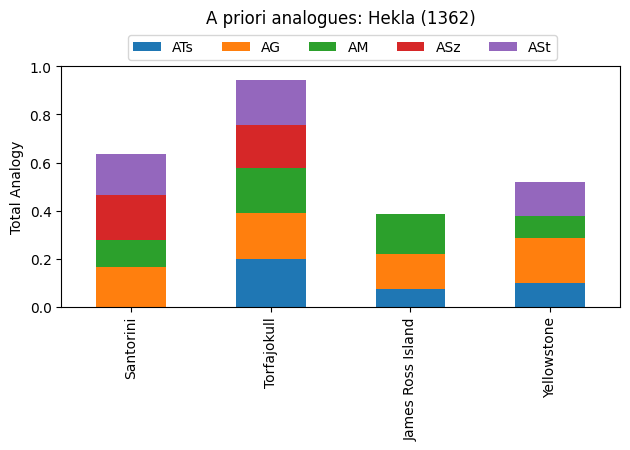

In [7]:
# Plot comparisons with specific volcanoes selected apriori
apriori_volcanoes = ['Santorini', 'Torfajokull', 'James Ross Island', 'Yellowstone']

# weights label is used in the filename if save_figure is True
weights_label = 'Ts{:.3f}G{:.3f}M{:.3f}Sz{:.3f}St{:.3f}'.format(*weights.values())

pvf.plot_bar_apriori_analogues(volcano_name, volcano_id, apriori_volcanoes,
                               volcans_result, weights_label, save_figure=False)

In [8]:
# Display proportion of better analogues than apriori volcanoes
percentiles, better_analogues = pvf.get_many_analogy_percentiles(volcano_input,
                                                                 apriori_volcanoes,
                                                                 volcans_result)



According to PyVOLCANS, the following percentage of volcanoes in the GVP database
are better analogues to Hekla than the 'a priori' analogues reported below:

Santorini (212040): 39%

Torfajokull (372050): 0%

James Ross Island (390829): 67%

Yellowstone (325010): 51%

